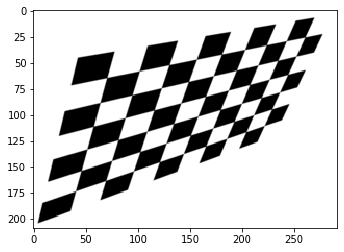

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

#reading the image
image = cv2.imread('skewed_chessboard.png')

#making a copy of the original image
image_copy = np.copy(image)

#changing the color from BGR to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

#showing the image
plt.imshow(image_copy)

## Detect corners

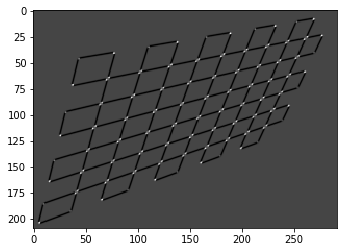

In [5]:
#converting into gray scale

gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

#converting to float type
gray = np.float32(gray)

#detecting corner using harris
dst = cv2.cornerHarris(gray, 2, 3, 0.04) 
#inputs are gray scaled float value followed by size of neighborhood to look at to find the potential corners, here '2' means a 2 by 2 pixel 
#'3' is the size of sobel kernel
# '0.04' is the constant value which helps to know which point is considered a corner, basically a value lower than 0.04 will result in more corners detected
#dst for destination

plt.imshow(dst, cmap = "gray")
#cmap controls the colormap used to display the values

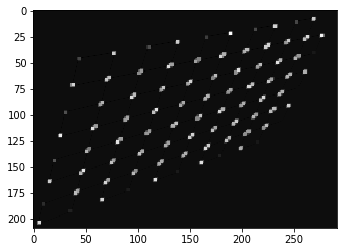

In [6]:
#dilating the corner image to enhance the corner points
#dilation basically enlarges bright regions or regions in foreground

dst = cv2.dilate(dst, None)

plt.imshow(dst, cmap  ='gray')

## Select and display strong corners

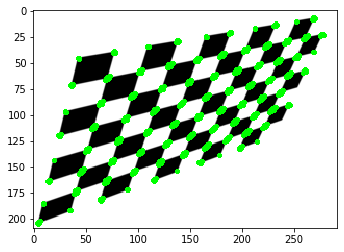

In [10]:
#defining a threshold for extracting strong corners
#This value may vary depending on the image

thresh = 0.01*dst.max()

#create an image copy to draw corners on

corner_image= np.copy(image_copy)

#iterating through all the corners and draw them on the image if they pass the threshold

for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if (dst[j,i] > thresh):
            #image, center point, radius, color, thickness
            cv2.circle(corner_image, (i,j), 1,(0,255,0), 1)
            
plt.imshow(corner_image)           